This tutorial gives you an idea about centrality with Networkx. Some other exercises such as file IO with Excel, eigenvector centrality and page rank are also covered.  

Before the start of writing any codes, it is important to load the approiate libraries with the following commands. Note that libraries loading must be placed at the top.

Before the start of writing any codes, it is important to load the approiate libraries with the following commands. Note that libraries loading must be placed at the top.

In [3]:
# Import networkx library and rename it as nx. 
import networkx as nx

# Adding support for high-performance, easy-to-use data structures and data analysis tools
import pandas as pd

# Adding support for large, multi-dimensional arrays and matrices.
import numpy as np

# Import linalg for Linear algebra
from scipy import linalg

# Import eigsh for the calculation of eigen-value
from scipy.sparse.linalg import eigsh

import matplotlib.pyplot as plt
import operator
import sys

# Part 1: Centrality Calculation

We read the graph from file 'centrality_example.txt' and express the graph using Networkx library. Then the graph is displayed on the screen for better illustration.

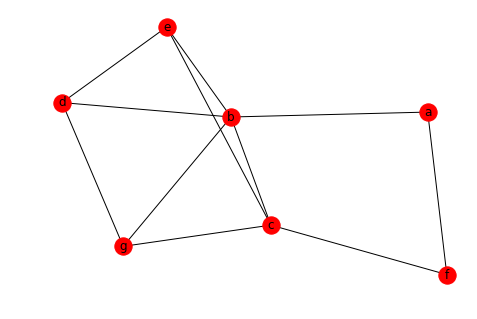

In [6]:
# Put the path of the folder that contains the data file.
place_holder = "./"

# Create an empty graph structure with no nodes and no edges.
G0 = nx.Graph()
# Read an un-directed graph from a list of edges
G0 = nx.read_edgelist(place_holder + "centrality_example.txt", nodetype = str)

# draw the graph to provide a better illustration
nx.draw_spring(G0, with_labels = True)

### Exercise: Degree centrality & Betweenness centrality

To calculate them, we can use the built-in functions in the networkx library.

In [7]:
# the function degree_centrality(G) is available in networkx.algorithms.centrality
deg_cent = nx.algorithms.centrality.degree_centrality(G0)

# The output is dictionary of nodes with degree centrality as the value
print("Degree centrality:")
print(deg_cent)

Degree centrality:
{'a': 0.3333333333333333, 'b': 0.8333333333333333, 'e': 0.5, 'c': 0.6666666666666666, 'd': 0.5, 'f': 0.3333333333333333, 'g': 0.5}


In [8]:
degree = [(u[0],u[1]/(G0.number_of_nodes()-1)) for u in list(G0.degree())]
degree

[('a', 0.3333333333333333),
 ('b', 0.8333333333333334),
 ('e', 0.5),
 ('c', 0.6666666666666666),
 ('d', 0.5),
 ('f', 0.3333333333333333),
 ('g', 0.5)]

In [9]:
# the function betweenness_centrality(G) is also available in networkx.algorithms.centrality
bet_cent = nx.algorithms.centrality.betweenness_centrality(G0)

print("Betweenness centrality:")
print(bet_cent)

Betweenness centrality:
{'a': 0.05, 'b': 0.3111111111111111, 'e': 0.03888888888888889, 'c': 0.23888888888888887, 'd': 0.02222222222222222, 'f': 0.03333333333333333, 'g': 0.03888888888888889}


# Part 2: Excel IO and eigenvector centrality (Similar to 4.3)

### (a) Load the zachary karate club information from an Excel file.

The data file is called "zachary_karate_club.xlsx".

In [10]:
# The file name
excelfile = "zachary_karate_club.xlsx"

Next, we have to read the Excel file using Pandas.

In [11]:
# Read the sheet 'T2-sheet-A' and T2-sheet-B
sheetA = pd.read_excel(excelfile, sheet_name = "T2A", usecols = "A:B")
sheetB = pd.read_excel(excelfile, sheet_name = "T2B", usecols = "A:B")

print("First Dataframe:")
print(sheetA)
print("Second Dataframe:")
print(sheetB)

First Dataframe:
    From  To
0      0   1
1      0   2
2      0   3
3      0   4
4      0   5
5      0   6
6      0   7
7      0   8
8      0   9
9      0  10
10     0  11
11     0  12
12     0  13
13     0  14
14     0  15
15     0  16
16     1   2
17     1   3
18     1   7
19    12   1
20    13   1
21     1  14
22     1  15
23     1  17
24     2   3
25     2   7
26     2   8
27    18   2
28    12   2
29    19   2
30    20   2
31     2  21
32     3   7
33    11   3
34    12   3
35     4   6
36     9   4
37     5   6
38     9   5
39    22   5
40    22   6
41    17   8
42    21   8
43    23   8
44    18  23
45    12  23
46    24  21
47    24  23
48    25  21
Second Dataframe:
    From  To
0     25  23
1     26  21
2     26  23
3     14  23
4     27  21
5     27  23
6     28  21
7     28  23
8     29  30
9     29  19
10    29  31
11    29  21
12    29  23
13    32  30
14    32  19
15    32  16
16    30  16
17    33  31
18    33  23
19    19  23
20    20  16
21    20  23
22    31  21
23 

In [12]:
# Then we concatenate the 2 dataframes
total = pd.concat([sheetA,sheetB], ignore_index = True)

# Print the matrix and the matrix size
print(total)

    From  To
0      0   1
1      0   2
2      0   3
3      0   4
4      0   5
5      0   6
6      0   7
7      0   8
8      0   9
9      0  10
10     0  11
11     0  12
12     0  13
13     0  14
14     0  15
15     0  16
16     1   2
17     1   3
18     1   7
19    12   1
20    13   1
21     1  14
22     1  15
23     1  17
24     2   3
25     2   7
26     2   8
27    18   2
28    12   2
29    19   2
..   ...  ..
48    25  21
49    25  23
50    26  21
51    26  23
52    14  23
53    27  21
54    27  23
55    28  21
56    28  23
57    29  30
58    29  19
59    29  31
60    29  21
61    29  23
62    32  30
63    32  19
64    32  16
65    30  16
66    33  31
67    33  23
68    19  23
69    20  16
70    20  23
71    31  21
72    31  23
73    17  21
74    17  23
75    16  21
76    16  23
77    21  23

[78 rows x 2 columns]


### (b) Exercise: We read the edgelist information, create an adjacency matrix, and calculate its eigenvalues and eigenvectors.

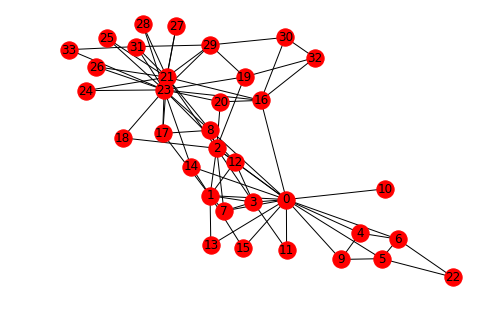

In [13]:
# Create a direct graph based on the dataframe format
G_zachary = nx.from_pandas_edgelist(total, "From", "To", create_using = nx.Graph())

nx.draw(G_zachary, with_labels = True)

### (c) Exercise: We now convert the edgelist into an adjacency matrix and calculate the eigenvalue.

In [14]:
# convert to adjacency matrix
attr_mat_zachary = nx.to_numpy_array(G_zachary)

# the eigenvalues can be calculated using eigsh since we know the adjacency matrix must be symmetry 
evalue, evector = eigsh(attr_mat_zachary)

# Get the largest and smallest eigenvalues, and the corresponding index from the returned values
maxindex, maxvalue = np.argmax(evalue), evalue[np.argmax(evalue)]

# Since the adjacency matrix must be a square matrix, the eigenvalue and vector will not be complex
print("Largest eigenvalue:", maxvalue)

print("Largest eigenvector:", evector[:, maxindex])


Largest eigenvalue: 6.725697727631727
Largest eigenvector: [-0.35549144 -0.26595992 -0.3171925  -0.21117972 -0.07596882 -0.07948305
 -0.07948305 -0.17095975 -0.22740391 -0.07596882 -0.0528557  -0.08425463
 -0.22647272 -0.09239954 -0.14791251 -0.09239954 -0.19103384 -0.1747583
 -0.10267425 -0.13347715 -0.13107782 -0.30864422 -0.02363563 -0.37336347
 -0.10140326 -0.10140326 -0.10140326 -0.10140326 -0.10140326 -0.15011857
 -0.05920647 -0.13496082 -0.05705244 -0.07557941]


In [15]:
eigenvector_centrality = abs(evector[:, maxindex])
eigenvector_centrality

array([0.35549144, 0.26595992, 0.3171925 , 0.21117972, 0.07596882,
       0.07948305, 0.07948305, 0.17095975, 0.22740391, 0.07596882,
       0.0528557 , 0.08425463, 0.22647272, 0.09239954, 0.14791251,
       0.09239954, 0.19103384, 0.1747583 , 0.10267425, 0.13347715,
       0.13107782, 0.30864422, 0.02363563, 0.37336347, 0.10140326,
       0.10140326, 0.10140326, 0.10140326, 0.10140326, 0.15011857,
       0.05920647, 0.13496082, 0.05705244, 0.07557941])

### (d) Finally, we use the eigenvector_centrality_numpy() from numpy to calcuate the eigenvector based centralities for comparison.

In [16]:
nx.eigenvector_centrality_numpy(G_zachary)

{0: 0.35549144452456627,
 1: 0.2659599195524914,
 2: 0.31719250448643166,
 3: 0.2111797203778902,
 4: 0.07596881818306854,
 5: 0.07948304511709915,
 6: 0.07948304511709904,
 7: 0.17095974804479622,
 8: 0.2274039071254002,
 9: 0.07596881818306858,
 10: 0.05285569749352118,
 11: 0.08425462871671359,
 12: 0.22647272014248118,
 13: 0.09239953819570246,
 14: 0.1479125102933876,
 15: 0.09239953819570255,
 16: 0.19103384140654378,
 17: 0.17475830231435321,
 18: 0.10267425072358637,
 19: 0.13347715338024033,
 20: 0.13107782298371098,
 21: 0.3086442197910475,
 22: 0.023635628104591067,
 23: 0.3733634702914832,
 24: 0.10140326218952476,
 25: 0.10140326218952468,
 26: 0.10140326218952478,
 27: 0.1014032621895247,
 28: 0.10140326218952478,
 29: 0.15011857186115313,
 30: 0.059206474916778586,
 31: 0.134960819262328,
 32: 0.05705244054116567,
 33: 0.07557941348827225}

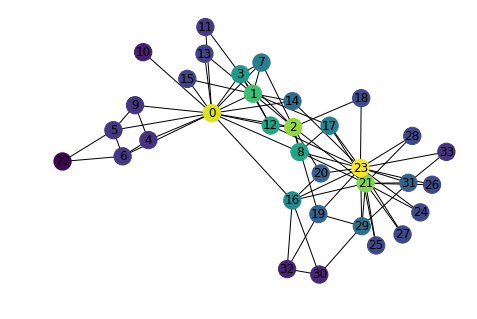

In [17]:
ec = nx.eigenvector_centrality_numpy(G_zachary)
nx.draw(G_zachary, node_color = list(ec.values()), with_labels = True)

You can refer to networkx website for more relevant functions to calculate centrality.

https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html

# Part 3: Page Rank Calculation (Similar to 4.6)

### Exercise: (a) We read the page rank network from the file 'page_rank_network.txt' and create an adjacency matrix accordingly.

In [18]:
# Use fixed-point instead of floating point in numpy
#np.set_printoptions(suppress = True)

# Read an un-directed graph from a list of edges
G = nx.read_edgelist(place_holder + "page_rank_network.txt", nodetype = str, create_using = nx.DiGraph())

# output the edgelist onto the screen
nx.write_weighted_edgelist(G, sys.stdout)

a b
b a
b e
e b
e c
e d
c b
c e
d b
d e


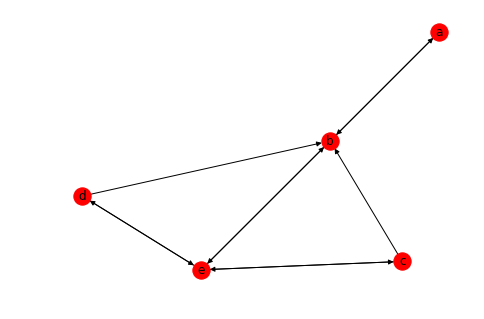

In [20]:
nx.draw(G,with_labels = True)

In [21]:
G.nodes()

NodeView(('a', 'b', 'e', 'c', 'd'))

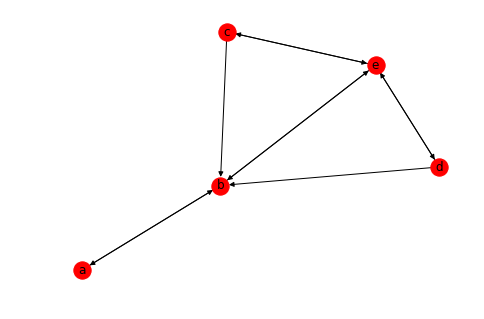

In [22]:
H = nx.DiGraph()
H.add_nodes_from(sorted(G.nodes(data = True)))
H.add_edges_from(G.edges(data = True))

G = H

nx.draw(G, with_labels = True)

In [23]:
G.nodes()

NodeView(('a', 'b', 'c', 'd', 'e'))

In [24]:
# create an adjacency matrix based on the un-directed graph
attr_mat = nx.attr_matrix(G,rc_order = sorted(G.nodes(), key=str))
print(attr_mat)

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0.]]


### Exercise: (b) Calculate the stochastic matrix and its transpose.

In [25]:
# get the weight matrix (stochastic matrices) W, axis = 1 says "get the sum along the columns"
weight_mat = attr_mat / attr_mat.sum(axis = 1)
print("The Weight matrix")
print(weight_mat)

# print an extra line for easier display
print('\n')

print("The transpose of the Weight matrix")
print(weight_mat.T)

The Weight matrix
[[0.         1.         0.         0.         0.        ]
 [0.5        0.         0.         0.         0.5       ]
 [0.         0.5        0.         0.         0.5       ]
 [0.         0.5        0.         0.         0.5       ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]]


The transpose of the Weight matrix
[[0.         0.5        0.         0.         0.        ]
 [1.         0.         0.5        0.5        0.33333333]
 [0.         0.         0.         0.         0.33333333]
 [0.         0.         0.         0.         0.33333333]
 [0.         0.5        0.5        0.5        0.        ]]


In [27]:
transition_matrix = nx.google_matrix(G, alpha = 1)
transition_matrix

matrix([[0.        , 1.        , 0.        , 0.        , 0.        ],
        [0.5       , 0.        , 0.        , 0.        , 0.5       ],
        [0.        , 0.5       , 0.        , 0.        , 0.5       ],
        [0.        , 0.5       , 0.        , 0.        , 0.5       ],
        [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ]])

In [28]:
from scipy.sparse.linalg import eigs
evalue, evec = eigs(transition_matrix.T, k=1, which='LM')
evalue

array([1.+0.j])

In [29]:
abs(evec)/abs(evec).sum()

array([[0.18181818],
       [0.36363636],
       [0.09090909],
       [0.09090909],
       [0.27272727]])

### Exercise: (c) Calcuate the eigen-vector using power method.

First, we create and initalize a starting vector for it to iterate on.

In [35]:
# Create a vector of given shape/dimension, filled with ones,
# then we multiply the the vector with 100
num_row = attr_mat.shape[0]

# fill with one in a column vector
r = np.ones((num_row,1)) /num_row

print("The starting vector")
print(r)

The starting vector
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]


Next, we use a while loop to implement power method that calculates page rank for directed graph. 

Basically, we want calculate r_(k+1)=transpose(W) x r_(k) 􏰆until is result is converged. We write the power method with a function.

In [36]:
# Import linalg for Linear algebra
from scipy import linalg

"""
This function implements power method.

Args:
    weight_mat: The weight matrix.
    r: The starting vector.

Returns:
    Null
"""

def power_method(weight_mat, r):

    # Initalize the boolean converged
    converged = False

    # Mark the number of iteration as zero at the begining
    numIter = 0

    while not converged:

        # calculate transpose(W) . r_(k)
        r_new = (weight_mat.T).dot(r)

        # Calculate the different between the previous r and the r from this iteration
        # by taking the norm
        if (linalg.norm(r-r_new) < 0.0001):
            converged = True
        else:
            numIter += 1
            r = r_new

    print("The number of iteration needed: ", end = '')
    print(numIter)

    print("The converged r")
    print(r)
    
    return r
    
r = power_method(weight_mat, r)

The number of iteration needed: 25
The converged r
[[0.18183091]
 [0.36362149]
 [0.09089284]
 [0.09089284]
 [0.27276193]]


In [37]:
r/ r.sum()

matrix([[0.18183091],
        [0.36362149],
        [0.09089284],
        [0.09089284],
        [0.27276193]])

In [39]:
page_rank = nx.pagerank(G, alpha = 0.85)
page_rank

{'a': 0.17685715941894684,
 'b': 0.34554556392580793,
 'c': 0.10552265230424038,
 'd': 0.10552265230424038,
 'e': 0.26655197204676434}